## Importando librerías

In [1]:
from keras.datasets import reuters
from keras import layers, models
import numpy as np

## Descarguemos datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #10000 PALABRAS MAS COMUNES

2110848/2110848 [==============================] - 0s 0us/step


### Diccionario de palabras

In [3]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
for _ in train_data[0]:
    print(word_index.get( _ - 3))

### Función de vectorizar 

In [5]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults     

## Transformando los datos

In [6]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [9]:
train_labels[0]

3

In [10]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Creando la red

In [49]:
model = models.Sequential()
model.add(layers.Dense(86, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(66, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [50]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']   
             )

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

### Entrenando el modelo

In [51]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 2s 80ms/step - loss: 2.8685 - acc: 0.3995 - val_loss: 1.8656 - val_acc: 0.5500
Epoch 2/9
16/16 [==============================] - 1s 68ms/step - loss: 1.8558 - acc: 0.5466 - val_loss: 1.5513 - val_acc: 0.6160
Epoch 3/9
16/16 [==============================] - 1s 67ms/step - loss: 1.5912 - acc: 0.6072 - val_loss: 1.4074 - val_acc: 0.6770
Epoch 4/9
16/16 [==============================] - 1s 67ms/step - loss: 1.4379 - acc: 0.6456 - val_loss: 1.2984 - val_acc: 0.6970
Epoch 5/9
16/16 [==============================] - 1s 67ms/step - loss: 1.3080 - acc: 0.6770 - val_loss: 1.2343 - val_acc: 0.7120
Epoch 6/9
16/16 [==============================] - 1s 68ms/step - loss: 1.2151 - acc: 0.7066 - val_loss: 1.1803 - val_acc: 0.7260
Epoch 7/9
16/16 [==============================] - 1s 67ms/step - loss: 1.1322 - acc: 0.7197 - val_loss: 1.1432 - val_acc: 0.7270
Epoch 8/9
16/16 [==============================] - 1s 67ms/step - loss: 1.0482 - acc: 0.73

### Validamos resultados

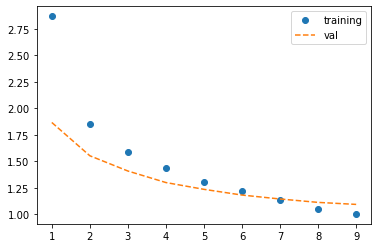

In [52]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [53]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1905 - acc: 0.7199


[1.1905313730239868, 0.719946563243866]

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

array([1.40058205e-06, 1.40384573e-05, 1.19825779e-06, 9.69036162e-01,
       2.71117557e-02, 2.18417904e-06, 1.43820635e-05, 2.50521043e-06,
       4.78513917e-04, 8.16392730e-06, 7.59104660e-06, 1.60818294e-04,
       1.24039730e-06, 8.10691345e-05, 7.33657271e-06, 2.86959439e-05,
       4.78806323e-04, 2.73210062e-05, 5.94920766e-06, 3.55365919e-04,
       1.79019861e-03, 1.41729652e-05, 1.46945706e-06, 4.28032617e-05,
       1.50744581e-05, 2.60766114e-06, 1.79994349e-05, 1.47667788e-06,
       4.12930094e-05, 3.76426324e-05, 2.54762426e-06, 2.02073466e-06,
       7.02984971e-06, 4.92394565e-06, 9.54738334e-06, 1.54302033e-05,
       2.81130979e-05, 1.98937887e-05, 3.34300671e-06, 5.06018405e-05,
       2.21478349e-05, 3.56746204e-05, 9.06572382e-08, 1.79041450e-07,
       3.27178486e-06, 6.00197791e-06], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax([2,5,65,3,6,7]) #SAQYEME LA POSCION EN LA QUE EL VALOR ES MAS ALTO

2

In [ ]:
np.argmax(predictions[0]) #SAQYEME LA POSCION EN LA QUE EL VALOR ES MAS ALTO

3